In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


file_path = 'Raw_Data_Heart_Attack.csv'

df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1) #droping ID column

sex_mapping = {'Male': 0, 'Female': 1} #turning string values to numerical values
df['Sex'] = df['Sex'].map(sex_mapping) #turning string values to numerical values

diet_mapping={'Unhealthy':0,'Average':1,'Healthy':2} #turning string values to numerical values
df['Diet']=df['Diet'].map(diet_mapping) #turning string values to numerical values

df[['Upper_BP', 'Lower_BP']] = df['Blood Pressure'].str.split('/', expand=True) #separating high and low  blood pressures
# Convert the new columns to numeric values
df['Upper_BP'] = pd.to_numeric(df['Upper_BP'], errors='coerce')
df['Lower_BP'] = pd.to_numeric(df['Lower_BP'], errors='coerce')

df = df.drop('Blood Pressure', axis=1) #dropping blood pressure column
df = df.drop('Country', axis=1) #dropping countries
df = df.drop('Continent', axis=1) #dropping continents
df = df.drop('Hemisphere', axis=1) #dropping hemispheres



# Assuming df is your DataFrame and 'YourColumn' is the column with missing values represented by "?"
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].replace('?', np.nan)  # Convert "?" to NaN

# Convert the column to numeric (assuming it contains numerical values)
df['Exercise Hours Per Week'] = pd.to_numeric(df['Exercise Hours Per Week'], errors='coerce')

# Calculate the median excluding NaN values
median_value = df['Exercise Hours Per Week'].median()

# Replace NaN (including values originally represented by "?") with the median value
df['Exercise Hours Per Week'].fillna(median_value, inplace=True)


auxilary=df['Heart Attack Risk'] # creating auxilary column so that I can move 'Heart Attack Risk' to the rightest position
df=df.drop('Heart Attack Risk',axis=1) #dropping heart attack values
df['Heart Attack Risk']=auxilary #appending 'Heart Attack Risk' to the right





X = df.iloc[:, :-1] #separating data from output
y = df.iloc[:, -1]#separating output from data; this is why I moved "Heart Attack Risk" to the rightest position



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

classifier = RandomForestClassifier(n_estimators=1000, random_state=420)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)


print("Results for Random Forest Classifier method")


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


# Precision
precision = precision_score(y_test, predictions, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1}")

#parameters testing took an impractical amount time


Results for Random Forest Classifier method
Accuracy: 0.6474614945807188
Precision: 0.5614249680655635
Recall: 0.6474614945807188
F1 Score: 0.5139138359799449


In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


file_path = 'Raw_Data_Heart_Attack.csv'

df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1) #droping ID column

sex_mapping = {'Male': 0, 'Female': 1} #turning string values to numerical values
df['Sex'] = df['Sex'].map(sex_mapping) #turning string values to numerical values

diet_mapping={'Unhealthy':0,'Average':1,'Healthy':2} #turning string values to numerical values
df['Diet']=df['Diet'].map(diet_mapping) #turning string values to numerical values

df[['Upper_BP', 'Lower_BP']] = df['Blood Pressure'].str.split('/', expand=True) #separating high and low  blood pressures
# Convert the new columns to numeric values
df['Upper_BP'] = pd.to_numeric(df['Upper_BP'], errors='coerce')
df['Lower_BP'] = pd.to_numeric(df['Lower_BP'], errors='coerce')

df = df.drop('Blood Pressure', axis=1) #dropping blood pressure column
df = df.drop('Country', axis=1) #dropping countries
df = df.drop('Continent', axis=1) #dropping continents
df = df.drop('Hemisphere', axis=1) #dropping hemispheres



# Assuming df is your DataFrame and 'YourColumn' is the column with missing values represented by "?"
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].replace('?', np.nan)  # Convert "?" to NaN

# Convert the column to numeric (assuming it contains numerical values)
df['Exercise Hours Per Week'] = pd.to_numeric(df['Exercise Hours Per Week'], errors='coerce')

# Calculate the median excluding NaN values
median_value = df['Exercise Hours Per Week'].median()

# Replace NaN (including values originally represented by "?") with the median value
df['Exercise Hours Per Week'].fillna(median_value, inplace=True)


auxilary=df['Heart Attack Risk'] # creating auxilary column so that I can move 'Heart Attack Risk' to the rightest position
df=df.drop('Heart Attack Risk',axis=1) #dropping heart attack values
df['Heart Attack Risk']=auxilary #appending 'Heart Attack Risk' to the right


X = df.iloc[:, :-1] #separating data from output
y = df.iloc[:, -1]#separating output from data; this is why I moved "Heart Attack Risk" to the rightest position

highest_accuracy=0
random_state_counter=0
for RandomState in range(10,100):

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RandomState)

  # Create a LogisticRegression classifier
  logreg_classifier = LogisticRegression()

  # Train the classifier on the training set
  logreg_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  predictions = logreg_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  if accuracy > highest_accuracy:
    highest_accuracy=accuracy
    random_state_counter=RandomState

print("Results for logistic regression method")

"""
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, predictions, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1}")

"""
print("highest accuracy is ",highest_accuracy, " at random state of ",random_state_counter )
#we get 0.664 at random state 93; 93 is at least a local maximum

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for logistic regression method
highest accuracy is  0.6640045636052482  at random state of  93


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

file_path = 'Raw_Data_Heart_Attack.csv'

df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1) #droping ID column

sex_mapping = {'Male': 0, 'Female': 1} #turning string values to numerical values
df['Sex'] = df['Sex'].map(sex_mapping) #turning string values to numerical values

diet_mapping={'Unhealthy':0,'Average':1,'Healthy':2} #turning string values to numerical values
df['Diet']=df['Diet'].map(diet_mapping) #turning string values to numerical values

df[['Upper_BP', 'Lower_BP']] = df['Blood Pressure'].str.split('/', expand=True) #separating high and low  blood pressures
# Convert the new columns to numeric values
df['Upper_BP'] = pd.to_numeric(df['Upper_BP'], errors='coerce')
df['Lower_BP'] = pd.to_numeric(df['Lower_BP'], errors='coerce')

df = df.drop('Blood Pressure', axis=1) #dropping blood pressure column
df = df.drop('Country', axis=1) #dropping countries
df = df.drop('Continent', axis=1) #dropping continents
df = df.drop('Hemisphere', axis=1) #dropping hemispheres



# Assuming df is your DataFrame and 'YourColumn' is the column with missing values represented by "?"
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].replace('?', np.nan)  # Convert "?" to NaN

# Convert the column to numeric (assuming it contains numerical values)
df['Exercise Hours Per Week'] = pd.to_numeric(df['Exercise Hours Per Week'], errors='coerce')

# Calculate the median excluding NaN values
median_value = df['Exercise Hours Per Week'].median()

# Replace NaN (including values originally represented by "?") with the median value
df['Exercise Hours Per Week'].fillna(median_value, inplace=True)


auxilary=df['Heart Attack Risk'] # creating auxilary column so that I can move 'Heart Attack Risk' to the rightest position
df=df.drop('Heart Attack Risk',axis=1) #dropping heart attack values
df['Heart Attack Risk']=auxilary #appending 'Heart Attack Risk' to the right


X = df.iloc[:, :-1] #separating data from output
y = df.iloc[:, -1]#separating output from data; this is why I moved "Heart Attack Risk" to the rightest position

highest_accuracy=0
random_state_counter=0
for RandomState in range(10,100):

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RandomState)

  # Create a KNeighborsClassifier (you can adjust 'n_neighbors' as needed)
  knn_classifier = KNeighborsClassifier(n_neighbors=50)

  # Train the classifier on the training set
  knn_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  predictions = knn_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  if accuracy > highest_accuracy:
    highest_accuracy=accuracy
    random_state_counter=RandomState

print("results for k-nearest neighbor method:")


"""
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, predictions, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1}")
"""
print("highest accuracy is ",highest_accuracy, " at random state of ",random_state_counter )

#we get 0.659 at 35 random state; 35 is at least a local maximum

results for k-nearest neighbor method:
highest accuracy is  0.6594409583571021  at random state of  35


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = 'Raw_Data_Heart_Attack.csv'

df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1) #droping ID column

sex_mapping = {'Male': 0, 'Female': 1} #turning string values to numerical values
df['Sex'] = df['Sex'].map(sex_mapping) #turning string values to numerical values

diet_mapping={'Unhealthy':0,'Average':1,'Healthy':2} #turning string values to numerical values
df['Diet']=df['Diet'].map(diet_mapping) #turning string values to numerical values

df[['Upper_BP', 'Lower_BP']] = df['Blood Pressure'].str.split('/', expand=True) #separating high and low  blood pressures
# Convert the new columns to numeric values
df['Upper_BP'] = pd.to_numeric(df['Upper_BP'], errors='coerce')
df['Lower_BP'] = pd.to_numeric(df['Lower_BP'], errors='coerce')

df = df.drop('Blood Pressure', axis=1) #dropping blood pressure column
df = df.drop('Country', axis=1) #dropping countries
df = df.drop('Continent', axis=1) #dropping continents
df = df.drop('Hemisphere', axis=1) #dropping hemispheres



# Assuming df is your DataFrame and 'YourColumn' is the column with missing values represented by "?"
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].replace('?', np.nan)  # Convert "?" to NaN

# Convert the column to numeric (assuming it contains numerical values)
df['Exercise Hours Per Week'] = pd.to_numeric(df['Exercise Hours Per Week'], errors='coerce')

# Calculate the median excluding NaN values
median_value = df['Exercise Hours Per Week'].median()

# Replace NaN (including values originally represented by "?") with the median value
df['Exercise Hours Per Week'].fillna(median_value, inplace=True)


auxilary=df['Heart Attack Risk'] # creating auxilary column so that I can move 'Heart Attack Risk' to the rightest position
df=df.drop('Heart Attack Risk',axis=1) #dropping heart attack values
df['Heart Attack Risk']=auxilary #appending 'Heart Attack Risk' to the right


X = df.iloc[:, :-1] #separating data from output
y = df.iloc[:, -1]#separating output from data; this is why I moved "Heart Attack Risk" to the rightest position

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

print("results for SVM method:")

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, predictions, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1}")

#took roughly 17 minutes! extremely inefficient!


results for SVM method:
Accuracy: 0.6360524814603536
Precision: 0.4905559638031432
Recall: 0.6360524814603536
F1 Score: 0.5030322597385872


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



file_path = 'Raw_Data_Heart_Attack.csv'

df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1) #droping ID column

sex_mapping = {'Male': 0, 'Female': 1} #turning string values to numerical values
df['Sex'] = df['Sex'].map(sex_mapping) #turning string values to numerical values

diet_mapping={'Unhealthy':0,'Average':1,'Healthy':2} #turning string values to numerical values
df['Diet']=df['Diet'].map(diet_mapping) #turning string values to numerical values

df[['Upper_BP', 'Lower_BP']] = df['Blood Pressure'].str.split('/', expand=True) #separating high and low  blood pressures
# Convert the new columns to numeric values
df['Upper_BP'] = pd.to_numeric(df['Upper_BP'], errors='coerce')
df['Lower_BP'] = pd.to_numeric(df['Lower_BP'], errors='coerce')

df = df.drop('Blood Pressure', axis=1) #dropping blood pressure column
df = df.drop('Country', axis=1) #dropping countries
df = df.drop('Continent', axis=1) #dropping continents
df = df.drop('Hemisphere', axis=1) #dropping hemispheres



# Assuming df is your DataFrame and 'YourColumn' is the column with missing values represented by "?"
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].replace('?', np.nan)  # Convert "?" to NaN

# Convert the column to numeric (assuming it contains numerical values)
df['Exercise Hours Per Week'] = pd.to_numeric(df['Exercise Hours Per Week'], errors='coerce')

# Calculate the median excluding NaN values
median_value = df['Exercise Hours Per Week'].median()

# Replace NaN (including values originally represented by "?") with the median value
df['Exercise Hours Per Week'].fillna(median_value, inplace=True)


auxilary=df['Heart Attack Risk'] # creating auxilary column so that I can move 'Heart Attack Risk' to the rightest position
df=df.drop('Heart Attack Risk',axis=1) #dropping heart attack values
df['Heart Attack Risk']=auxilary #appending 'Heart Attack Risk' to the right


X = df.iloc[:, :-1] #separating data from output
y = df.iloc[:, -1]#separating output from data; this is why I moved "Heart Attack Risk" to the rightest position

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build the neural network model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Convert predictions to binary (0 or 1)

# Evaluate the model
print("results for deep neural networks:")

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, predictions, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, predictions, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1}")

# we did no parameters testing because it would take too much time without any acceptable conclusion about why this or that value is the best

Epoch 1/10
176/176 [==============================] - 3s 8ms/step - loss: 0.6707 - accuracy: 0.6200 - val_loss: 0.6629 - val_accuracy: 0.6405
Epoch 2/10
176/176 [==============================] - 1s 4ms/step - loss: 0.6570 - accuracy: 0.6430 - val_loss: 0.6588 - val_accuracy: 0.6448
Epoch 3/10
176/176 [==============================] - 1s 7ms/step - loss: 0.6512 - accuracy: 0.6419 - val_loss: 0.6578 - val_accuracy: 0.6455
Epoch 4/10
176/176 [==============================] - 2s 9ms/step - loss: 0.6483 - accuracy: 0.6419 - val_loss: 0.6562 - val_accuracy: 0.6455
Epoch 5/10
176/176 [==============================] - 2s 9ms/step - loss: 0.6452 - accuracy: 0.6412 - val_loss: 0.6565 - val_accuracy: 0.6448
Epoch 6/10
176/176 [==============================] - 1s 6ms/step - loss: 0.6423 - accuracy: 0.6410 - val_loss: 0.6570 - val_accuracy: 0.6448
Epoch 7/10
176/176 [==============================] - 1s 6ms/step - loss: 0.6389 - accuracy: 0.6419 - val_loss: 0.6577 - val_accuracy: 0.6448
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


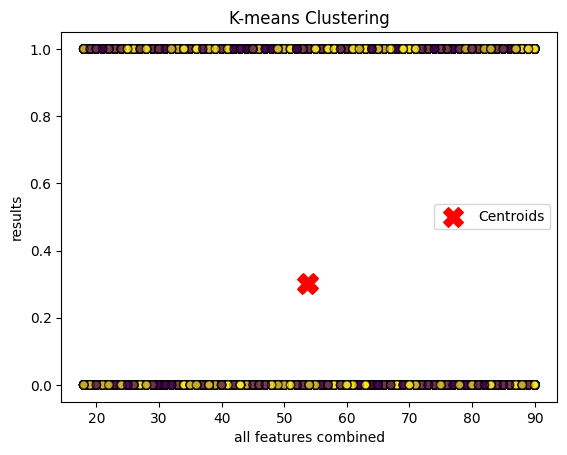

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

file_path = 'Raw_Data_Heart_Attack.csv'

df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1) #droping ID column

sex_mapping = {'Male': 0, 'Female': 1} #turning string values to numerical values
df['Sex'] = df['Sex'].map(sex_mapping) #turning string values to numerical values

diet_mapping={'Unhealthy':0,'Average':1,'Healthy':2} #turning string values to numerical values
df['Diet']=df['Diet'].map(diet_mapping) #turning string values to numerical values

df[['Upper_BP', 'Lower_BP']] = df['Blood Pressure'].str.split('/', expand=True) #separating high and low  blood pressures
# Convert the new columns to numeric values
df['Upper_BP'] = pd.to_numeric(df['Upper_BP'], errors='coerce')
df['Lower_BP'] = pd.to_numeric(df['Lower_BP'], errors='coerce')

df = df.drop('Blood Pressure', axis=1) #dropping blood pressure column
df = df.drop('Country', axis=1) #dropping countries
df = df.drop('Continent', axis=1) #dropping continents
df = df.drop('Hemisphere', axis=1) #dropping hemispheres


# Assuming df is your DataFrame and 'YourColumn' is the column with missing values represented by "?"
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].replace('?', np.nan)  # Convert "?" to NaN

# Convert the column to numeric (assuming it contains numerical values)
df['Exercise Hours Per Week'] = pd.to_numeric(df['Exercise Hours Per Week'], errors='coerce')

# Calculate the median excluding NaN values
median_value = df['Exercise Hours Per Week'].median()

# Replace NaN (including values originally represented by "?") with the median value
df['Exercise Hours Per Week'].fillna(median_value, inplace=True)


auxilary=df['Heart Attack Risk'] # creating auxilary column so that I can move 'Heart Attack Risk' to the rightest position
df=df.drop('Heart Attack Risk',axis=1) #dropping heart attack values
df['Heart Attack Risk']=auxilary #appending 'Heart Attack Risk' to the right


X = df.iloc[:, :-1] #separating data from output
y = df.iloc[:, -1]#separating output from data; this is why I moved "Heart Attack Risk" to the rightest position




# Use df.values to get the NumPy array
data = df.values

# Initialize KMeans with the number of clusters you want
kmeans = KMeans(n_clusters=2) # not risky and risky

# Fit the model to your data
kmeans.fit(data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('all features combined')
plt.ylabel('results')
plt.legend()
plt.show()